In [81]:
ls *.hdf5

3687-55269.hdf5  7456-56727.hdf5  7457-56746.hdf5


# Fiber Statistics

In [101]:
import h5py
import numpy as np
testf="7456-56727.hdf5"
def fibersta(testf):
 fx1=h5py.File(testf,"r")
 p=fx1.keys()[0]
 m=fx1[str(p)].keys()[0]
 coad_size=[]
 pm=str(p)+'/'+str(m)
 fs=fx1[pm].keys()
 for i in range(0,len(fs)):
    pmfi=pm+'/'+str(fs[i])+'/'+'coadd'
    try:
        #print pmfi
        coad_size.append(fx1[pmfi].value.nbytes)
    except:
        pass
    #print coad_size[i]
 return coad_size
cs1=fibersta(testf)
#print cs1
print "length:%d"%len(cs1)
print "min:%.2f"%np.amin(cs1)
print "max:%.2f"%np.amax(cs1)
print "median:%.2f"%np.median(cs1)
print "mean:%.2f"%np.mean(cs1)

length:1000
min:148448.00
max:148448.00
median:148448.00
mean:148448.00


# Catalog Statistics

In [106]:
meta=['plugmap', 'zbest', 'zline', 'photo/match', 'photo/matchflux', 'photo/matchpos']
testf="3687-55269.hdf5"
def catasta(testf):
 fx1=h5py.File(testf,"r")
 p=fx1.keys()[0]
 m=fx1[str(p)].keys()[0]
 cata_size=[]
 pm=str(p)+'/'+str(m)
 fs=fx1[pm].keys()
 for i in range(0,len(meta)):
    pmfi=pm+'/'+meta[i]
    try:
        #print pmfi
        cata_size.append(fx1[pmfi].value.nbytes)
    except:
        pass
    #print coad_size[i]
 return cata_size
cs1=catasta(testf)
#print cs1
print "length:%d"%len(cs1)
print "min:%.2f"%np.amin(cs1)
print "max:%.2f"%np.amax(cs1)
print "median:%.2f"%np.median(cs1)
print "mean:%.2f"%np.mean(cs1)

length:6
min:147000.00
max:3012000.00
median:1991500.00
mean:1738500.00


In [13]:
print fx1.keys()
print fx1['3687'].keys()

[u'3687']
[u'55269']


In [14]:
parent_id='3687/55269'

In [15]:
arr=fx1[parent_id].keys()

[u'1',
 u'10',
 u'100',
 u'1000',
 u'101',
 u'102',
 u'103',
 u'104',
 u'105',
 u'106',
 u'107',
 u'108',
 u'109',
 u'11',
 u'110',
 u'111',
 u'112',
 u'113',
 u'114',
 u'115',
 u'116',
 u'117',
 u'118',
 u'119',
 u'12',
 u'120',
 u'121',
 u'122',
 u'123',
 u'124',
 u'125',
 u'126',
 u'127',
 u'128',
 u'129',
 u'13',
 u'130',
 u'131',
 u'132',
 u'133',
 u'134',
 u'135',
 u'136',
 u'137',
 u'138',
 u'139',
 u'14',
 u'140',
 u'141',
 u'142',
 u'143',
 u'144',
 u'145',
 u'146',
 u'147',
 u'148',
 u'149',
 u'15',
 u'150',
 u'151',
 u'152',
 u'153',
 u'154',
 u'155',
 u'156',
 u'157',
 u'158',
 u'159',
 u'16',
 u'160',
 u'161',
 u'162',
 u'163',
 u'164',
 u'165',
 u'166',
 u'167',
 u'168',
 u'169',
 u'17',
 u'170',
 u'171',
 u'172',
 u'173',
 u'174',
 u'175',
 u'176',
 u'177',
 u'178',
 u'179',
 u'18',
 u'180',
 u'181',
 u'182',
 u'183',
 u'184',
 u'185',
 u'186',
 u'187',
 u'188',
 u'189',
 u'19',
 u'190',
 u'191',
 u'192',
 u'193',
 u'194',
 u'195',
 u'196',
 u'197',
 u'198',
 u'199',
 u'

In [16]:
id=parent_id+'/plugmap'
sfiber=parent_id+'/129'
coaid=sfiber+"/coadd"
expid=sfiber+"/exposures"

In [17]:
d1=fx1[id]
#print fx1[sfiber].keys()
#print fx1[sfiber]
#print fx1[coaid]
#print fx1[expid].keys()
d_coad=fx1[coaid][:]
d_coad
for i in fx1[expid].keys():
    xb=expid+'/'+i+'/b'
    xr=expid+'/'+i+'/r'
    d_xb=fx1[xb][:]
    #print 'd_xb:',d_xb
    d_xr=fx1[xr][:]
    #print 'd_xr:',d_xr
fx1[sfiber].keys()

[u'coadd', u'exposures']

In [18]:
d1

<HDF5 dataset "plugmap": shape (1000,), type "|V277">

In [19]:
meta=[]
path=[]
cur={}
def find_id(name):
    cur_node=name.encode('ascii','ignore')
    node=pid+cur_node
    node_t=str(type(fx1[node]))
    if 'group' in node_t:
        node_t='g'
    else:
        #node_t='d-'+str(fx1[node].shape)+'-'+str(fx1[node].dtype)
        node_t=fx1[node].dtype
    path.append(node)
    meta.append(node_t)
    cur[node]=node_t
#d1.visit(find_id)
#'g'==cur['3687/55269/1/exposures/111770/b']


In [20]:
#ffx=h5py.File('gtest7.h5','w')
#dtype1=[('WAVE', '<f4'), ('FLUX', '<f4'), ('IVAR', '<f4'), ('MASK', '<i4'), ('WAVEDISP', '<f4'), ('SKY', '<f4'), ('X', '<f4'), ('CALIB', '<f4')]

In [21]:
#dfx1=ffx.create_dataset('3687/55269/1/exposures/111770/b', shape=(4112,),dtype=ddtype1)

In [22]:
#dfx=fx1['3687/55269/1/exposures/111770/b'].value
#dfx

In [23]:
#dfx1[:,]=dfx

In [24]:
#dfx1.value

In [25]:
#ffx.close()

In [26]:
#fffx=h5py.File('gtest6.h5','r')
#fffx['3687/55269/1/exposures/111770/b'].value

In [27]:
ls

1081659_100k.err  1130243_100k.out        pmf-list/
1081659_100k.out  1130374_100k.err        select_10-time
1123873_100k.err  1130374_100k.out        selected_files_1.out
1123873_100k.out  3687-55269.hdf5         submit-bb.sh*
1124036_100k.err  boss2hdf5-parallel.py*  submit_part.sh*
1124036_100k.out  dbin1.h5                submit-scaling.sh*
1124256_100k.err  dbin2.h5                submit.sh*
1124256_100k.out  dbin3.h5                submit_sub.sh*
1124802_100k.err  dbin.h5                 subset1.h5
1124802_100k.out  gtest7.h5               test_pw.h5
1124888_100k.err  h5boss-test.ipynb       test_pw.py
1124888_100k.out  input-full              Untitled.ipynb
1130243_100k.err  input-full2-bk


In [28]:
#import os
#os.path.dirname(os.path.realpath('gtest6.h5'))+'/'+str(3)+'_'+str(1)+'.h5_slave'


In [29]:
#print os.path.basename("/global/u1/j/jialin/h5boss-util/h5boss_py/demo/3_1.h5_slave").split('.')[0]

In [30]:
ls

1081659_100k.err  1130243_100k.out        pmf-list/
1081659_100k.out  1130374_100k.err        select_10-time
1123873_100k.err  1130374_100k.out        selected_files_1.out
1123873_100k.out  3687-55269.hdf5         submit-bb.sh*
1124036_100k.err  boss2hdf5-parallel.py*  submit_part.sh*
1124036_100k.out  dbin1.h5                submit-scaling.sh*
1124256_100k.err  dbin2.h5                submit.sh*
1124256_100k.out  dbin3.h5                submit_sub.sh*
1124802_100k.err  dbin.h5                 subset1.h5
1124802_100k.out  gtest7.h5               test_pw.h5
1124888_100k.err  h5boss-test.ipynb       test_pw.py
1124888_100k.out  input-full              Untitled.ipynb
1130243_100k.err  input-full2-bk


In [32]:
fxdbin1=h5py.File('dbin4.h5','a')
fxdbin1

<HDF5 file "dbin4.h5" (mode r+)>

In [33]:
for id in fx1['3687/55269'].keys():
    cid='3687/55269/'+id
    fxdbin1.create_group(cid)
    fx1.copy(cid,fxdbin1[cid])

In [ ]:
ls

# Fit the I/O time

In [45]:
import numpy as np
fiber_number=[10.0,100.0,1000.0,10000.0]
fiber_copy_time=[6.26,81.97,877.53,7498.72]
catalog_copy_time=[3.61,37.35,414.17,927.33]
read_fiber_col_time=[2.67,29.86,291.27,799.41]
catalog_rowcopy_time=[0.9,7.19,120.07,124.77]
total_cost=[114.53,233.48,1421.72,8607.17]
fiber_number=np.array(fiber_number,dtype=float)
fiber_copy_time=np.array(fiber_copy_time,dtype=float)
catalog_copy_time=np.array(catalog_copy_time,dtype=float)
read_fiber_col_time=np.array(read_fiber_col_time,dtype=float)
catalog_rowcopy_time=np.array(catalog_rowcopy_time,dtype=float)
fiber_copy=np.polyfit(fiber_copy_time,fiber_number,1)
catalog_copy=np.polyfit(catalog_copy_time,fiber_number,1)

In [46]:
print fiber_copy
print catalog_copy

[  1.33934963 -56.72454817]
[  10.54151859 -865.80694843]


In [55]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x+b
popt,pcov = curve_fit(func,fiber_number,fiber_copy_time)
popt_cata,pcov_cata=curve_fit(func,fiber_number,catalog_copy_time)

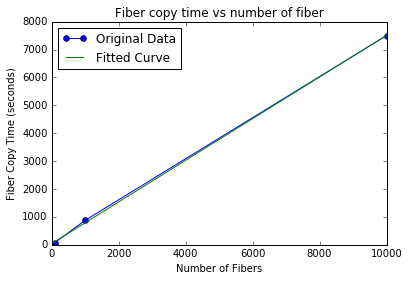

In [77]:
import sympy as sym
%matplotlib inline
plt.plot(fiber_number,fiber_copy_time,'-o',label='Original Data')
plt.plot(fiber_number,func(fiber_number,*popt),label="Fitted Curve")
plt.legend(loc='upper left')
xs = sym.Symbol('x')    
#tex = sym.latex(func(fiber_number,*popt)).replace('$', '')
#plt.title(r'$f(x)= %s$' %(tex),fontsize=16)
plt.title("Fiber copy time vs number of fiber")
plt.xlabel(r"Number of Fibers")
plt.ylabel(r"Fiber Copy Time (seconds)")

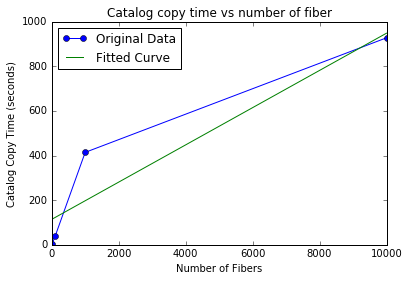

In [78]:
plt.plot(fiber_number,catalog_copy_time,'-o',label='Original Data')
plt.plot(fiber_number,func(fiber_number,*popt_cata),label="Fitted Curve")
plt.legend(loc='upper left')
plt.title("Catalog copy time vs number of fiber")
plt.xlabel(r"Number of Fibers")
plt.ylabel(r"Catalog Copy Time (seconds)")

In [107]:
ls all-ost1

all-ost1


In [123]:
text_file = open("all-ost1", "r")
lines = text_file.read().splitlines()

In [124]:
len(lines)

19160

In [143]:
import numpy as np
myarray = map(int, lines)
myarray = np.asarray(myarray)
#print lines
xr=range(0,96)


In [148]:
np.histogram(myarray,bins=xr)

(array([205, 201, 200, 208, 210, 199, 207, 214, 210, 200, 205, 195, 209,
        208, 207, 218, 203, 199, 217, 200, 207, 201, 198, 215, 206, 210,
        203, 196, 209, 208, 209, 219, 203,   0, 210, 208, 221, 206, 203,
        208, 204, 197, 208, 207, 215,   0, 207, 203, 205, 199, 193, 207,
        209, 202, 193, 220, 206, 204, 195, 203, 218, 202, 202, 216, 208,
          0, 205, 196, 221, 212, 209, 203, 207, 208, 192, 204, 204, 207,
        197, 221, 213, 212, 196, 205, 202, 200, 208, 218, 209, 206, 197,
        207, 200, 203, 420]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]))

In [152]:
myarray

array([ 0,  0,  0, ..., 95, 95, 95])

In [2]:
cd pmf-list/

/global/u1/j/jialin/h5boss-util/h5boss_py/demo/pmf-list


# sorting pmf

In [215]:
import pandas as pd
import numpy as np
filename='pmf500k'
dc=pd.read_csv(filename,sep=' ',dtype=str,header=0)
ds=dc.sort_values(by='plates' ,ascending=True)
nan_rows = ds[ds.isnull().T.any().T]
dc.drop(dc.index[nan_rows.index], inplace=True)
ds=dc.sort_values(by='plates' ,ascending=True)
ds.to_csv(filename+'-sorted.csv',index=False,sep=' ',header='plates mjds fibers')
ds=pd.read_csv(filename+'-sorted.csv',sep=' ',dtype=int,header=0)
ps=pd.Series(ds['plates'])
vc=ps.value_counts(sort=True)

In [216]:
print vc
ds=ds[ds.mjds<60000]
ds=ds[ds.mjds>1000]
ds=ds[ds.plates<8000]
ds=ds[ds.plates>1000]
ds=ds[ds.fibers<1001]
ds=ds[ds.fibers>0]

#dds=dds[dds.mjds>20000 ]
#dds=dds[dds.plates>100 ]
#dds=dds[dds.plates>9000 ]
#print len(dc)
#print len(ddc)
ds.to_csv(filename+'-sorted.csv',index=False,sep=' ',header='plates mjds fibers',na_rep='NA')
#ddss=dds[dds.plates<str(100)]
df=ds.reindex(np.random.permutation(ds.index))
df.to_csv(filename+'-shuffle.csv',index=False,sep=' ',header='plates mjds fibers',na_rep='NA')


3662        252
6682        248
6873        248
6265        246
4804        244
3787        244
4180        242
5949        242
3784        242
5135        242
4081        241
4773        240
4654        239
7454        239
7385        239
5002        239
4778        238
3773        238
7383        237
6783        237
4693        237
4235        237
5857        237
6787        237
4238        237
6831        237
4576        236
6474        236
5441        236
6258        236
           ... 
36936187      1
5834          1
57299         1
44552         1
45136         1
63639         1
136           1
33805         1
42226583      1
969           1
404482        1
4167          1
36574543      1
396038        1
71236508      1
594404        1
397           1
44953         1
75490         1
76002         1
543           1
68            1
6447368       1
4743699       1
139           1
711           1
3767016       1
69            1
679509        1
179           1
Name: plates, dtype: int

In [191]:
len(ds)

9972

In [248]:
global_dict={}
global_dict['3665/55247/7/exposures/108815/b']=('int',2,'1.h5')
global_dict['3665/55247/7/coadd']=('int',2,'1.h5')
global_dict['3665/55247/7/exposures']=('int',2,'1.h5')
global_dict['3665/55247/65']=('int',2,'1.h5')
global_dict['3665/55247/704/coadd']=('int',2,'1.h5')
global_dict['3665/55243/704/coadd']=('int',2,'1.h5')

In [249]:
global_dict

{'3665/55243/704/coadd': ('int', 2, '1.h5'),
 '3665/55247/65': ('int', 2, '1.h5'),
 '3665/55247/7/coadd': ('int', 2, '1.h5'),
 '3665/55247/7/exposures': ('int', 2, '1.h5'),
 '3665/55247/7/exposures/108815/b': ('int', 2, '1.h5'),
 '3665/55247/704/coadd': ('int', 2, '1.h5')}

In [250]:
def locate_fiber_in_catalog(global_dict):
    revised_dict={}# key: pm, value: (fiberid, global_offset, infile)
    for key,value in global_dict.items():
        if key.split('/')[-1]=='coadd':
            pm=key.split('/')[0]+'/'+key.split('/')[1]
            if pm in revised_dict.keys():
                #latest=revised_dict[pm][-1][2]
                latest=latest+1
                new_value=(key.split('/')[2],value[2],latest)
                revised_dict[pm].append(new_value)
            else:
                latest=0
                new_value=(key.split('/')[2],value[2],latest)
                revised_dict.setdefault(pm, [])
                revised_dict[pm].append(new_value)
    return revised_dict

In [269]:
revised_dict=locate_fiber_in_catalog(global_dict)
print revised_dict

{'3665/55247': [('704', '1.h5', 0), ('7', '1.h5', 1)], '3665/55243': [('704', '1.h5', 0)]}


In [271]:
#revised_dict=revised_dict.items()
#for i in range(0,len(revised_dict)):
#    pm=revised_dict[i][1]
#    print len(pm)

In [272]:
revised_dict['3665/55247']

[('704', '1.h5', 0), ('7', '1.h5', 1)]

In [121]:
ss='|S6'
ss[ss.index('S')+1]
def print_sizeof(dtt):
 for i in range(0,len(dtt)):
    k=str(dtt[i])
    if k=='int8':
        print "sizeof(H5T_NATIVE_INT8),"
    elif k=='int16':
        print "sizeof(H5T_NATIVE_INT16),"    
    elif k=='int32':
        print "sizeof(H5T_NATIVE_INT32),"
    elif k=='int64':
        print "sizeof(H5T_NATIVE_INT64),"
    elif k=='uint8':
        print "sizeof(H5T_NATIVE_UINT8),"
    elif k=='uint16':
        print "sizeof(H5T_NATIVE_UINT16),"    
    elif k=='uint32':
        print "sizeof(H5T_NATIVE_UINT32),"
    elif k=='uint64':
        print "sizeof(H5T_NATIVE_UINT64),"        
    elif k=='float32':
        print "sizeof(H5T_NATIVE_FLOAT),"
    elif k=='float64':
        print "sizeof(H5T_NATIVE_DOUBLE),"
    elif '|S' in k:
        print "sizeof(H5T_C_S1)*%s,"%(k[k.index('S')+1:])
    elif '<i4' in k:
        kk=k[k.index('i')+6:k.index('))')]
        kk1=kk.replace(' ','').split(',')[0]
        kk2=kk.replace(' ','').split(',')[1]
        if kk2.isdigit():
            kk1=int(kk1)*int(kk2)
        else:
            kk1=int(kk1)
        print "sizeof(H5T_NATIVE_INT32)*%d,"%kk1
    elif 'f4' in k:
        kk=k[k.index('f')+6:k.index('))')]
        kk1=kk.replace(' ','').split(',')[0]
        kk2=kk.replace(' ','').split(',')[1]
        if kk2.isdigit():
            kk1=int(kk1)*int(kk2)
        else:
            kk1=int(kk1)
        print "sizeof(H5T_NATIVE_FLOAT)*%s,"%kk1
    elif 'f8' in k:
        kk=k[k.index('f')+6:k.index('))')]
        kk1=kk.replace(' ','').split(',')[0]
        kk2=kk.replace(' ','').split(',')[1]
        if kk2.isdigit():
            kk1=int(kk1)*int(kk2)
        else:
            kk1=int(kk1)
        print "sizeof(H5T_NATIVE_DOUBLE)*%s,"%kk1    
def print_ini(dtt):
  total=0
  print(len(dtt))
  for i in range(0,len(dtt)):
    k=str(dtt[i])
    if k=='int8':
        print "H5T_NATIVE_INT8 %s,"%dtt.names[i]
    elif k=='uint8':
        print "H5T_NATIVE_UINT8 %s,"%dtt.names[i]     
    elif k=='int16':
        print "H5T_NATIVE_INT16 %s,"%dtt.names[i]
    elif k=='uint16':
        print "H5T_NATIVE_UINT16 %s,"%dtt.names[i]  
    elif k=='int32':
        print "H5T_NATIVE_INT32 %s,"%dtt.names[i]
    elif k=='uint32':
        print "H5T_NATIVE_UINT32 %s,"%dtt.names[i]        
    elif k=='int64':
        print "H5T_NATIVE_INT64 %s,"%dtt.names[i]
    elif k=='uint64':
        print "H5T_NATIVE_UINT64 %s,"%dtt.names[i]        
    elif k=='float32':
        print "H5T_NATIVE_FLOAT %s,"%dtt.names[i]
    elif k=='float64':
        print "H5T_NATIVE_DOUBLE %s,"%dtt.names[i]
    elif '|S' in k:
        print "H5T_C_S1 %s[%s],"%(dtt.names[i],k[k.index('S')+1:])
    elif '<i4' in k:
        #print (k)
        kk=k[k.index('i')+6:k.index('))')]
        kk1=kk.replace(' ','').split(',')[0]
        kk2=kk.replace(' ','').split(',')[1]
        if kk2.isdigit():
            kk1=int(kk1)*int(kk2)
        else:
            kk1=int(kk1)
        print "H5T_NATIVE_INT32 %s[%d],"%(dtt.names[i],kk1)
    elif 'f4' in k:
        #print (k)
        kk=k[k.index('f')+6:k.index('))')]
        kk1=kk.replace(' ','').split(',')[0]
        kk2=kk.replace(' ','').split(',')[1]
        if kk2.isdigit():
            kk1=int(kk1)*int(kk2)
        else:
            kk1=int(kk1)        
        print "H5T_NATIVE_FLOAT %s[%d],"%(dtt.names[i],kk1)
    elif 'f8' in k:
        #print (k)
        kk=k[k.index('f')+6:k.index('))')]
        kk1=kk.replace(' ','').split(',')[0]
        kk2=kk.replace(' ','').split(',')[1]
        if kk2.isdigit():
            kk1=int(kk1)*int(kk2)
        else:
            kk1=int(kk1)        
        print "H5T_NATIVE_DOUBLE %s[%d],"%(dtt.names[i],kk1)
    else:
        print ("numlllllllllllll:::%s"%dtt.names[i],dtt[i])

def print_offset(dtt,cataname):
  total=0
  print(len(dtt))
  for i in range(0,len(dtt)):
    k=str(dtt[i])
    print "HOFFSET ( %s,%s ),"%(cataname.upper(),dtt.names[i])

# Dtype Matching to HDF5 Native Type

In [131]:
import h5py
fx=h5py.File('3687-55269.hdf5','r');
catalog='zline'
dtt=fx['3687/55269/'+catalog].dtype
print "initialize:\n"
print_ini(dtt)
print "sizeof:\n"
print_sizeof(dtt)
print "offset:\n"
print_offset(dtt,catalog)
#print "compare:\n"
#for i in range(0,len(dtt)):
#    print dtt[i]

k="('<f4', (5, 15))"
k=k[k.index('f')+6:k.index('))')]
#print k
#kk1=k.replace(' ','').split(',')[0]
#kk2=k.replace(' ','').split(',')[1]
#print kk1
#print kk2
#print kk1.isdigit()
#print kk2.isdigit()

initialize:

19
H5T_NATIVE_INT32 PLATE,
H5T_NATIVE_INT32 MJD,
H5T_NATIVE_INT32 FIBERID,
H5T_C_S1 LINENAME[13],
H5T_NATIVE_DOUBLE LINEWAVE,
H5T_NATIVE_FLOAT LINEZ,
H5T_NATIVE_FLOAT LINEZ_ERR,
H5T_NATIVE_FLOAT LINESIGMA,
H5T_NATIVE_FLOAT LINESIGMA_ERR,
H5T_NATIVE_FLOAT LINEAREA,
H5T_NATIVE_FLOAT LINEAREA_ERR,
H5T_NATIVE_FLOAT LINEEW,
H5T_NATIVE_FLOAT LINEEW_ERR,
H5T_NATIVE_FLOAT LINECONTLEVEL,
H5T_NATIVE_FLOAT LINECONTLEVEL_ERR,
H5T_NATIVE_INT32 LINENPIXLEFT,
H5T_NATIVE_INT32 LINENPIXRIGHT,
H5T_NATIVE_FLOAT LINEDOF,
H5T_NATIVE_FLOAT LINECHI2,
sizeof:

sizeof(H5T_NATIVE_INT32),
sizeof(H5T_NATIVE_INT32),
sizeof(H5T_NATIVE_INT32),
sizeof(H5T_C_S1)*13,
sizeof(H5T_NATIVE_DOUBLE),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_FLOAT),
sizeof(H5T_NATIVE_INT32),
sizeof(H5T_NATIVE_INT32),
sizeof

In [1]:
ls

1k1m-cori.sh*     2948767_100k.out               2970938_200k.err
1k1m-project.sh*  2948811_100k.err               2970938_200k.out
1k1m.sh*          2948811_100k.out               2970939_500k.err
2924648_10k.err   2948863_100k.err               2970939_500k.out
2924691_10k.err   2948863_100k.out               2979562_10k.err
2924738_10k.err   2948917_100k.err               2979562_10k.out
2924738_10k.out   2948917_100k.out               2979562_nodes10k_catalog.txt
2924786_100k.err  2967851_100k.err               2979562_nodes10k_fiber.txt
2938674_100k.err  2967851_100k.out               2979888_10k.err
2938769_100k.err  2967884_100k.err               2979888_10k.out
2938901_100k.err  2967884_100k.out               2979891_10k.err
2938901_100k.out  2967954_10k.err                2979891_10k.out
2938978_100k.err  2967954_10k.out                2979891_nodes10k_catalog.txt
2938978_100k.out  2968103_10k.err                2979891_nodes10k_fiber.txt
2947432_100k.err  2968103_10k.out     

In [2]:
ls 2979891_nodes10k_fiber.txt

2979891_nodes10k_fiber.txt


In [34]:
import pandas as pd
import numpy as np
filename='2979891_nodes10k_fiber.txt'
dc=pd.read_csv(filename,sep=':',dtype=str,header=-1)
ps=pd.Series(dc[1])
vc=ps.value_counts(sort=True)
print vc

/global/cscratch1/sd/jialin/h5boss/3929-55335.hdf5    207
/global/cscratch1/sd/jialin/h5boss/5289-55893.hdf5    204
/global/cscratch1/sd/jialin/h5boss/3945-55648.hdf5    190
/global/cscratch1/sd/jialin/h5boss/3865-55272.hdf5    175
/global/cscratch1/sd/jialin/h5boss/6117-56272.hdf5    170
/global/cscratch1/sd/jialin/h5boss/4293-55509.hdf5    168
/global/cscratch1/sd/jialin/h5boss/7029-56455.hdf5    156
/global/cscratch1/sd/jialin/h5boss/6129-56301.hdf5    155
/global/cscratch1/sd/jialin/h5boss/3790-55208.hdf5    152
/global/cscratch1/sd/jialin/h5boss/6284-56310.hdf5    152
/global/cscratch1/sd/jialin/h5boss/3766-55213.hdf5    152
/global/cscratch1/sd/jialin/h5boss/4545-55567.hdf5    152
/global/cscratch1/sd/jialin/h5boss/4466-55857.hdf5    152
/global/cscratch1/sd/jialin/h5boss/3781-55243.hdf5    147
/global/cscratch1/sd/jialin/h5boss/5339-55922.hdf5    145
/global/cscratch1/sd/jialin/h5boss/7108-56686.hdf5    138
/global/cscratch1/sd/jialin/h5boss/4079-55363.hdf5    138
/global/cscrat

In [2]:
ls

1k1m-cori.sh*                index_list               output/
1k1m-project.sh*             index_list1              pagesize*
1k1m.sh*                     input_1                  pagesize.c
all-ost1                     input-full               pmf-list/
bbtest1                      input-full1              ps_mem.py
bbtest2                      input-full2-bk           readh5.py
bbtest3                      input-full-bb            submit-bb.sh*
bbtest4                      input-full-cori          submit_part.sh*
boss2hdf5-parallel.py*       input-full-cori-output   submit-scaling.sh*
drop_cache.py*               input-full-index         submit.sh*
drop_file_from_page_cache*   input-full-project       submit_sub.sh*
drop_file_from_page_cache.c  is_file_in_page_cache*   test1.sh*
get_all_catalog.py           is_file_in_page_cache.c  test_low.py
h5boss-test.ipynb            log/                     test_pw.py


In [ ]:
import h5py
import os
from os import listdir
from os.path import isfile, join

mypath="/global/cscratch1/sd/jialin/h5boss_v2"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
len()